In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utils import functions #importando as funções do arquivo utils.py para maior organização

In [3]:
utils = functions()

In [4]:
Df = pd.read_csv('quotas.csv') #como os dados estão em um arquivo csv, é muito conveniente usar o pandas
                                #para realizar a análise

In [5]:
Df.head() #ver como os dados estão organizados

,date,quota_value,net_worth,fund_name,fund_class
0,8/31/2020,1.710898,2.173858e+08,Fundo 1,Fundo de Ações
1,8/31/2020,1.708746,1.848605e+08,Fundo 2,Fundo de Ações
2,8/31/2020,1.763618,5.398929e+09,Fundo 3,Fundo de Ações
3,8/31/2020,1.287330,2.975126e+07,Fundo 4,Fundo de Ações
4,8/31/2020,1.236828,9.534258e+07,Fundo 5,Fundo de Ações


In [6]:
len(Df.fund_name.unique()) #número de fundos presentes no arquivo csv

619

Para calcularmos a taxa de retorno diária e mensal de cada um dos fundos, é preciso organizarmos os dados
de acordo com as datas e os nomes dos mesmos. Para isso, é necessário utilizarmos um formato conveninente.

In [7]:
Df['date'] = Df.apply(lambda x: utils.processDate(x['date']), axis=1) #aplicando a funcao processDate para a coluna de datas
Df['fund_name'] = Df.apply(lambda x: utils.processName(x['fund_name']), axis=1)#aplicando a funcao processName para a coluna
                                                                    #de nomes
#lembrando que a classe do objeto utils está no arquivo utils.py    
    
Df["quota_value"] = pd.to_numeric(Df["quota_value"], downcast="float")
#como iremos realizar cálculos, os valores das cotas foram transformadas para floats

O desafio pede para calcular a taxa de retorno mensal, taxa de retorno diária e o indíce sharpe. Sabendo que para realizar esses cálculos é preciso ter dados organizados por data e por nome, temos de organizar o DataFrame dessa forma.

In [8]:
sorted_df = Df.sort_values(["fund_name", "date"], ascending = (True, True)) 
#um novo Df em que foi organizado de acordo com os valores crescentes das colunas de nome e data

In [9]:
sorted_df #o resultado é esse, e agora podemos realizar o que é pedido

,date,quota_value,net_worth,fund_name,fund_class
0,0,1.710898,217385837.9,1,Fundo de Ações
1718,1,1.753410,222896658.0,1,Fundo de Ações
1717,2,1.760532,224147179.5,1,Fundo de Ações
1716,3,1.722689,215889595.7,1,Fundo de Ações
2828,4,1.719393,215823919.4,1,Fundo de Ações
...,...,...,...,...,...
12135,24,1.000000,121400532.7,619,Fundo de Ações
12134,25,0.999103,121291653.7,619,Fundo de Ações
12137,28,0.979233,118879378.2,619,Fundo de Ações
12141,29,0.974173,118265163.5,619,Fundo de Ações


In [10]:
data=[]
rankDf = pd.DataFrame(data, columns=['fund_name', 'return', 'sharp'])
#para maior organização, um novo Df foi criado para a realização do ranking de fundos que apresentaram a maior taxa de
#retorno mensal e indice sharpe

In [11]:
i = 1 # começo iterando a partir do primeiro nome do fundo que será o Fundo 1
rf = 0.0185 #no documento é informado que a taxa livre de risco anualizada do periodo tem esse valor

while i < 620:  #iterando para todos os nomes posíveis presentes no Df
    
    tempDf = sorted_df[sorted_df['fund_name'] == i] #Df contido em sorted_df que apresenta apenas os os valores 
                                                    #referentes ao fundo da iteração atual
        
    #devido a inconsistências observadas no banco de dados de alguns fundos que não apresentam nenhum dado no dia
    #31 agosto, não faz sentido para estes calcular a taxa de retorno mensal, já que não possuímos a cota inicial
    if tempDf['date'].iloc[0] == 0: #se a primeira data for 0(31 de agosto) == True
        #definindo o valor das cotas finais e iniciais
        cota_final = tempDf['quota_value'].iloc[-1]
        cota_inicial = tempDf['quota_value'].iloc[0]
        
        #outro filtro é aplicado, dessa vez para verificar se os valores são diferentes de zero, pois não faz sentido  
        #calcular a taxa de retorno se alguma das cotas forem nulas
        if cota_inicial != 0 and cota_final != 0:
            
            retorno = cota_final / cota_inicial - 1 #taxa de retorno
            std = tempDf['quota_value'].std() #desvio padrao
            s = (retorno - rf) / std #calculo do indice sharp
    
            data = np.array([i, retorno, s]) 
            ser = pd.Series(data, index =['fund_name', 'return', 'sharp']) #criando um pandas series para adicionar
                                                                    #no rankDf como uma nova linha

            rankDf = rankDf.append(ser,ignore_index=True)
    
    i += 1

In [12]:
rankDf.head() #resultado

,fund_name,return,sharp
0,1.0,-0.058306,-1.579355
1,2.0,-0.052593,-1.807390
2,3.0,-0.076259,-1.503432
3,4.0,-0.034913,-2.464082
4,5.0,-0.041817,-2.194625


In [13]:
returnDf = rankDf.nlargest(5, 'return')
returnDf #5 fundos que obtiveram as maiores taxas de retorno

,fund_name,return,sharp
65,67.0,0.255209,0.987034
578,585.0,0.099325,0.556837
12,13.0,0.074871,0.000492
125,128.0,0.037637,1.285702
198,201.0,0.035986,0.645999


TOP 5:<BR>
Fundo 13<br>
Fundo 67<br>
Fundo 128<br>
Fundo 201<br>
Fundo 585<br>    

In [14]:
sharpDf = rankDf.nlargest(5, 'sharp')
sharpDf.head() #5 fundos que obtiveram os maiores valores de indice sharp

,fund_name,return,sharp
125,128.0,0.037637,1.285702
65,67.0,0.255209,0.987034
198,201.0,0.035986,0.645999
406,411.0,0.022640,0.589395
578,585.0,0.099325,0.556837


TOP 5:<BR>
Fundo 67<br>
Fundo 128<br>
Fundo 201<br>
Fundo 411<br>
Fundo 585<br>   

Por coincidencia(ou não), no ranking avaliando esses dois parametros, obtivemos resultados repetidos. Fazendo um filtro para descobrirmos os dados únicos, e assim construir os gráficos da taxa de retorno diário, temos:

In [15]:
funds = [] #array que armazenará dados únicos
returnFunds = returnDf.fund_name.values #ranking da taxa de retorno
sharpFunds = sharpDf.fund_name.values #ranking do indice sharp
funds = np.append(returnFunds, sharpFunds) 
funds = np.unique(funds) #filtrando o array para obtermos apenas os valores únicos
funds = funds.astype(int)
funds

array([ 13,  67, 128, 201, 411, 585])

Agora é necessário calcular a taxa de retorno diária para os fundos escolhidos e após isso calcular a correlação entre os valores da taxa de retorno diário.<BR>
Uma nova coluna no DataFrame será adicionada para os valores da taxa de retorno diária    

In [16]:
sorted_df['daily_return'] = ((sorted_df.quota_value / sorted_df.quota_value.shift(1)) -1) * 100 
#calculando o retorno diário em porcentagem para apresentar o gráfico, temos
sorted_df

,date,quota_value,net_worth,fund_name,fund_class,daily_return
0,0,1.710898,217385837.9,1,Fundo de Ações,NaN
1718,1,1.753410,222896658.0,1,Fundo de Ações,2.484763
1717,2,1.760532,224147179.5,1,Fundo de Ações,0.406182
1716,3,1.722689,215889595.7,1,Fundo de Ações,-2.149540
2828,4,1.719393,215823919.4,1,Fundo de Ações,-0.191289
...,...,...,...,...,...,...
12135,24,1.000000,121400532.7,619,Fundo de Ações,0.000000
12134,25,0.999103,121291653.7,619,Fundo de Ações,-0.089687
12137,28,0.979233,118879378.2,619,Fundo de Ações,-1.988822
12141,29,0.974173,118265163.5,619,Fundo de Ações,-0.516671


Como pode ser notado, as linhas com a data zero(31 de agosto) ficam com um valor de taxa de retorno sem significado, pois não possuem um valor de cota anterior. Então para filtrar isso, basta excluir as linhas que possuem a data como valor zero.<br><br>
Um 'problema' presente em algumas linhas do DataFrame é o valor da cota ser igual a zero, e isso gera problema para o dia em que a cota é igual a zero e o seguinte. Visto que a taxa de retorno diária zerá -100% no dia e infinito no dia seguinte.<br><br>
Digo que é um 'problema', pois como falado no documento, as operações de aplicação e resgate não alteram o valor das cotas.  E uma queda e subida tão repentinas como uma função degrau não se aplicam a realidade. Assim, os pontos da vizinhança da singularidade foram descartados.<br><br>
Por conta desses motivos, além das linhas com datas com valor igual a zero, as linhas que possuirem o valor da cota igual a zero serão removidas.

In [17]:
return_df = sorted_df[(sorted_df != 0).all(1)] #contornando o problema de dados iguais a zero
return_df #resultado

,date,quota_value,net_worth,fund_name,fund_class,daily_return
1718,1,1.753410,222896658.0,1,Fundo de Ações,2.484763
1717,2,1.760532,224147179.5,1,Fundo de Ações,0.406182
1716,3,1.722689,215889595.7,1,Fundo de Ações,-2.149540
2828,4,1.719393,215823919.4,1,Fundo de Ações,-0.191289
4245,8,1.706576,214310011.2,1,Fundo de Ações,-0.745475
...,...,...,...,...,...,...
11210,30,1.000000,1080000.0,618,Fundo Multimercado,-99.000000
12134,25,0.999103,121291653.7,619,Fundo de Ações,-0.089687
12137,28,0.979233,118879378.2,619,Fundo de Ações,-1.988822
12141,29,0.974173,118265163.5,619,Fundo de Ações,-0.516671


 Segue os plots referentes a taxa de retorno diário dos Fundos: 13,  67, 128, 201, 411, 585

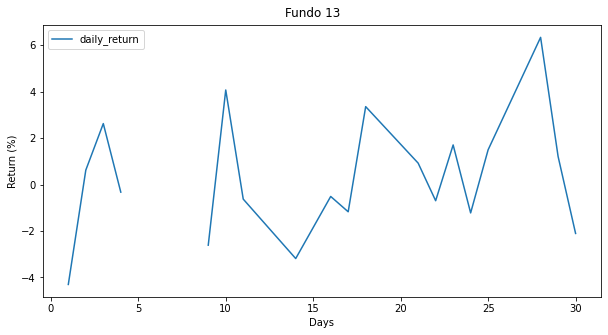

In [18]:
utils.plotChart(return_df[return_df['fund_name'] == 13], 13)
#No Fundo 13 temos a questão do valor das cotas iguais a zero, o que pode ser visto gráficamente

In [19]:
sorted_df[sorted_df['fund_name'] == 13] #graficamente os dados do dia 7 e 8 de setembro não são representados

,date,quota_value,net_worth,fund_name,fund_class,daily_return
12,0,525.333862,27624183.43,13,Fundo de Ações,354.760223
2164,1,502.739838,26629033.79,13,Fundo de Ações,-4.300886
2165,2,505.864105,26794519.19,13,Fundo de Ações,0.621450
2166,3,519.134644,27497430.97,13,Fundo de Ações,2.623343
2865,4,517.433838,27407342.59,13,Fundo de Ações,-0.327623
3042,7,0.000000,0.00,13,Fundo de Ações,-100.000000
5178,8,529.330688,28037494.20,13,Fundo de Ações,inf
5177,9,515.512756,27305587.89,13,Fundo de Ações,-2.610451
5179,10,536.492371,28416832.52,13,Fundo de Ações,4.069662
5180,11,533.126038,28238523.82,13,Fundo de Ações,-0.627470


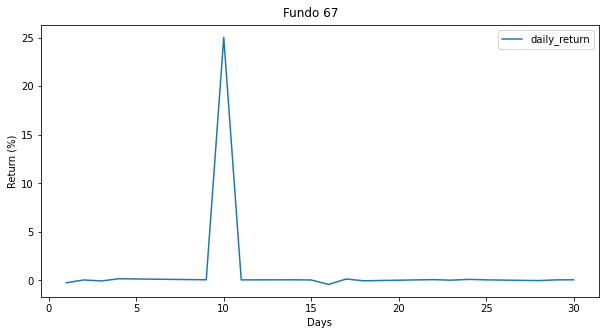

In [20]:
utils.plotChart(return_df[return_df['fund_name'] == 67], 67)

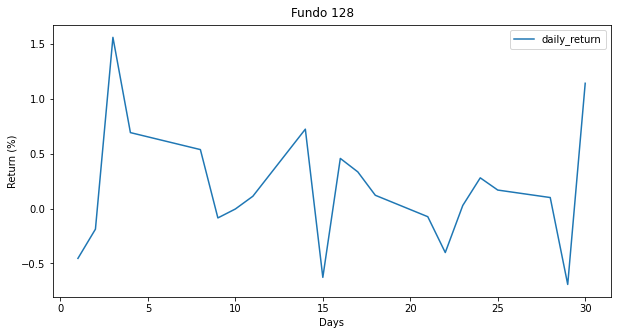

In [21]:
utils.plotChart(return_df[return_df['fund_name'] == 128], 128)

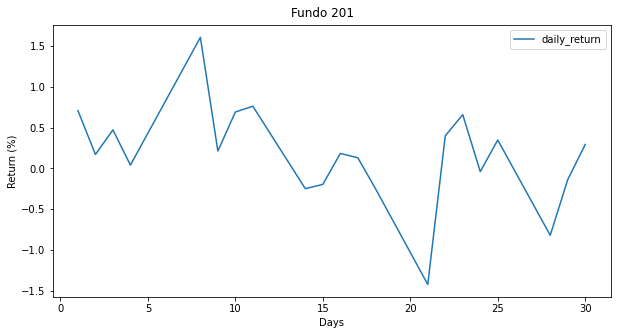

In [22]:
utils.plotChart(return_df[return_df['fund_name'] == 201], 201)

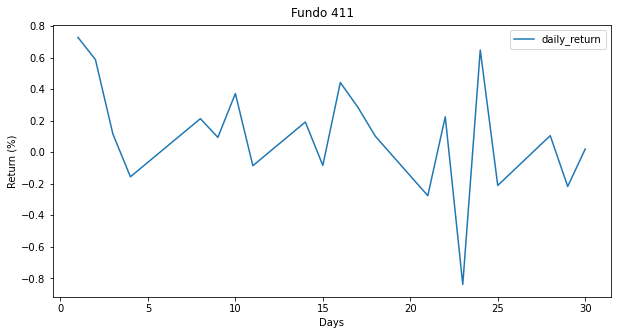

In [23]:
utils.plotChart(return_df[return_df['fund_name'] == 411], 411)

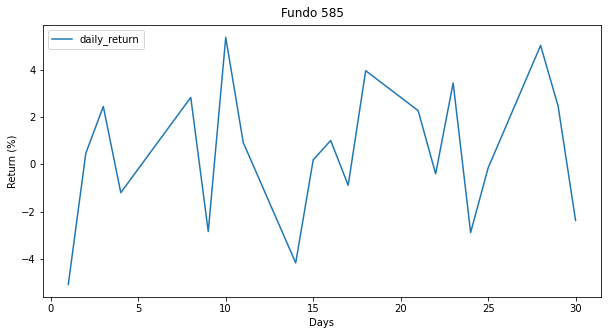

In [24]:
utils.plotChart(return_df[return_df['fund_name'] == 585], 585)

Agora para última parte do desafio, temos de selecionar 5 empresas e seus respectivos pares que possuem maior correlação entre a taxa de retorno diária.<br>
Para maior organização, um DataFrame chamado será criado, chamado daily_df, em que cada coluna representará os retornos diários de um fundo. Após isso, calcularemos a correlação entre as variáveis usando um método do próprio pandas. 

In [25]:
data=[]
daily_df = pd.DataFrame(data, columns=[])

In [26]:
names = return_df.fund_name.values
names = np.unique(names) #separando os nomes dos fundos após os filtros utilizados

for name in names : #iterando por todos os nomes de fundos
    
    #criando um array com os valores da taxa de retorno diario para o fundo da atual iteração
    return_series = return_df[return_df['fund_name']==name].daily_return.values 
    
    if len(return_series) == 21: #escolhendo os fundos que possuem dados para todos os dias do mês de setembro  
        daily_df[name] = return_series
        

In [27]:
daily_df #esse é o resultado

,1,2,3,4,5,6,7,8,10,11,...,601,602,603,604,605,606,607,608,609,610
0,2.484763,2.209413,2.660394,2.835238,2.023721,0.250328,7.643640,2.434814,3.655148,0.381708,...,2.189147,-0.286245,2.489710,-1.270682,1.831400,1.862109,2.640331,-0.024873,0.088692,1.823664
1,0.406182,-0.426060,0.617075,-0.539672,-0.055361,-0.018668,0.421822,0.986445,0.014377,0.063026,...,0.102472,-0.289190,0.121319,0.593507,0.855041,0.851572,-0.059503,0.057089,0.330007,0.683928
2,-2.149540,-1.849985,-1.311189,-1.702040,-1.519561,-0.092536,3.116608,-1.625824,0.200403,-0.154519,...,-3.379405,-0.287902,-2.404726,-0.838590,-0.200146,-0.189310,-1.843935,-0.056338,0.048804,-2.259940
3,-0.191289,0.058639,0.121355,-0.280249,0.316846,-0.008911,-0.481117,1.216590,-0.420058,0.134480,...,0.780618,-0.288725,0.140083,0.096512,0.901163,0.911665,0.421262,-0.147933,0.068545,0.716782
4,-0.745475,0.251400,-0.926203,-0.781083,-0.463390,0.134897,-3.476512,0.406277,0.878811,-0.391817,...,-0.474226,-0.289559,-0.121129,1.260698,-0.528872,-0.528246,-0.973731,-0.053340,-0.169909,-1.038861
5,0.604928,1.052618,0.569201,1.899600,0.576425,0.144148,4.273176,1.408672,0.152230,0.410831,...,1.012194,-0.290400,1.539183,-0.756186,0.512683,0.506842,1.501572,-0.122052,-0.117135,1.174581
6,-1.489794,-2.628422,-2.432895,-2.438176,-2.084249,-0.131297,-3.204793,-2.310574,-1.465011,-0.464565,...,-2.525657,-0.291246,-2.782786,0.491607,-1.076090,-1.064724,-2.310801,0.226939,0.011563,-2.093685
7,-1.152849,-1.608747,-1.508224,-0.356436,-0.743353,-0.026369,-1.624036,-1.911074,1.197875,-0.121176,...,0.240564,-0.292093,-0.989187,-0.853157,0.233555,0.234926,-0.380421,-0.146991,0.051188,-0.681084
8,1.459551,2.782726,2.838027,1.185858,2.080369,0.303733,4.815316,2.783036,1.607263,0.464582,...,2.405727,-0.292951,2.929759,0.519037,1.970553,1.975143,2.350557,0.102544,-0.050938,2.065217
9,-0.017095,0.063074,-0.312722,1.138806,-0.145543,-0.012147,-0.711280,0.068545,-0.134277,0.132871,...,-0.698745,-0.293809,-0.378394,-0.087363,-0.211096,-0.211161,0.274575,0.221467,0.173521,0.023484


In [28]:
correlationDf = daily_df.corr(method ='kendall')
#utilizando o método do pandas para encontrar a correlação entre todas as colunas do DataFrame

In [29]:
correlationDf #resultado

,1,2,3,4,5,6,7,8,10,11,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.638095,0.638095,0.476190,0.666667,0.504762,0.428571,0.638095,0.514286,0.561905,...,0.638095,0.047619,0.685714,-0.123810,0.523810,0.514286,0.619048,-0.238095,-0.019048,0.666667
2,0.638095,1.000000,0.657143,0.571429,0.761905,0.580952,0.466667,0.790476,0.552381,0.676190,...,0.752381,0.085714,0.857143,-0.180952,0.600000,0.590476,0.733333,-0.276190,-0.209524,0.685714
3,0.638095,0.657143,1.000000,0.514286,0.819048,0.409524,0.638095,0.771429,0.552381,0.752381,...,0.695238,0.180952,0.742857,-0.161905,0.809524,0.800000,0.714286,-0.276190,-0.095238,0.800000
4,0.476190,0.571429,0.514286,1.000000,0.619048,0.380952,0.419048,0.533333,0.409524,0.647619,...,0.590476,0.114286,0.619048,-0.247619,0.533333,0.523810,0.761905,-0.114286,-0.123810,0.561905
5,0.666667,0.761905,0.819048,0.619048,1.000000,0.514286,0.533333,0.761905,0.619048,0.742857,...,0.780952,0.095238,0.828571,-0.190476,0.761905,0.752381,0.838095,-0.228571,-0.142857,0.790476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.514286,0.590476,0.800000,0.523810,0.752381,0.419048,0.647619,0.647619,0.600000,0.742857,...,0.704762,0.266667,0.714286,-0.247619,0.990476,1.000000,0.723810,-0.342857,-0.104762,0.733333
607,0.619048,0.733333,0.714286,0.761905,0.838095,0.542857,0.523810,0.733333,0.514286,0.790476,...,0.752381,0.123810,0.800000,-0.257143,0.733333,0.723810,1.000000,-0.238095,-0.114286,0.723810
608,-0.238095,-0.276190,-0.276190,-0.114286,-0.228571,-0.200000,-0.295238,-0.314286,-0.342857,-0.276190,...,-0.333333,-0.238095,-0.304762,0.314286,-0.333333,-0.342857,-0.238095,1.000000,0.247619,-0.304762
609,-0.019048,-0.209524,-0.095238,-0.123810,-0.142857,-0.095238,0.000000,-0.076190,-0.219048,-0.133333,...,-0.171429,0.190476,-0.200000,-0.019048,-0.114286,-0.104762,-0.114286,0.247619,1.000000,-0.104762


Como eu possuo liberdade para selecionar os fundos, escolhi 5 dos que faziam parte do ranking de maior taxa de retorno mensal e com maior valor de índice sharpe.<br> 
Os escolhidos foram : 13, 67, 128, 201, 411, 585

In [30]:
correlationDf[67].nlargest(2)
#como podemos ver, observando essa matriz, o maior valor de cada coluna sempre será 1, pois é a correlação da variável
#com ela mesma. Por isso, é observado o segundo valor.

67     1.000000
336    0.409524
Name: 67, dtype: float64

In [31]:
correlationDf[128].nlargest(2)

128    1.000000
452    0.314286
Name: 128, dtype: float64

In [32]:
correlationDf[201].nlargest(2)

201    1.000000
308    0.466667
Name: 201, dtype: float64

In [33]:
correlationDf[411].nlargest(2)

411    1.000000
569    0.457143
Name: 411, dtype: float64

In [34]:
correlationDf[585].nlargest(2)

585    1.000000
150    0.847619
Name: 585, dtype: float64

Com essa análise, temos os 5 pares:<br>
Fundo 67 e Fundo 336 <br>
Fundo 128 e Fundo 452<br>
Fundo 201 e Fundo 308<br>
Fundo 411 e Fundo 569<br>
Fundo 585 e Fundo 150<br>  

Sei que na área de comentarios do código não é recomendado o uso de caracteres especiais, mas dado a natureza da situação, preferi ser o mais claro possível. Caso tenha alguma dúvida sobre o raciocínio ou sobre o que foi escrito, estou livre para responder cada uma delas.

Desde já, agradeço pela oportunidade.
<br>
<br>
Lukas Müller de Oliveira